In [106]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [60]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [202]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

Посмотрим на данные:

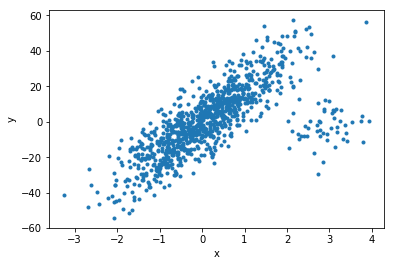

In [203]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [204]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предикт на тестовых данных:

In [205]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [206]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

MAE: 9.940362029807723
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Посмотрим на веса обученной модели:

In [207]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073648


Визуализируем:

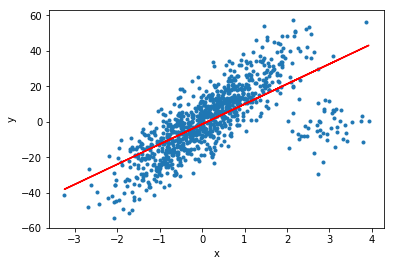

In [10]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [ ]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

In [122]:
from imp import reload
import linear_regression as mylinregr

In [368]:
reload(mylinreg)

<module 'linear_regression' from '/home/andrew/Документы/data/python/mailru/AppliedPythonAtom/homeworks/homework_06_ml/linear_regression.py'>

In [420]:
lrm = mylinregr.LinearRegression()

In [413]:
lrm.fit(X_train, y_train)

In [414]:
y1_hat = lrm.predict(X_test)

In [415]:
print("MAE:", mean_absolute_error(y_test, y1_hat))
print("MSE:", mean_squared_error(y_test, y1_hat))
print("R^2 score:", r2_score(y_test, y1_hat), end='\n\n')

print("handmade MAE:", metrics.mae(y_test, y1_hat))
print("handmade MSE:", metrics.mse(y_test, y1_hat))
print("handmade R^2 score:", metrics.r2_score(y_test, y1_hat))

MAE: 9.71883544800984
MSE: 184.93332207425058
R^2 score: 0.4368857912508385

handmade MAE: 9.71883544800984
handmade MSE: 184.93332207425058
handmade R^2 score: 0.4368857912508385


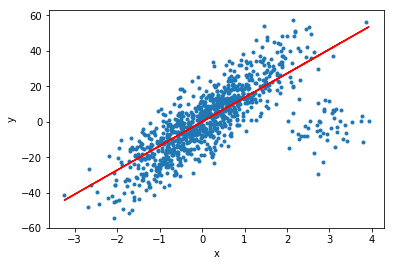

In [417]:
plt.plot(X, y, ".");
plt.plot(X, X * lrm._coef + X * lrm._intercept, "r")
plt.xlabel("x");
plt.ylabel("y");

С L1 регуляризацией:

In [424]:
lrm2 = mylinregr.LinearRegression(regularization='L1')

In [425]:
lrm2.fit(X_train, y_train)

In [426]:
y2_hat = lrm2.predict(X_test)

In [427]:
print("MAE:", mean_absolute_error(y_test, y2_hat))
print("MSE:", mean_squared_error(y_test, y2_hat))
print("R^2 score:", r2_score(y_test, y2_hat), end='\n\n')

print("handmade MAE:", metrics.mae(y_test, y2_hat))
print("handmade MSE:", metrics.mse(y_test, y2_hat))
print("handmade R^2 score:", metrics.r2_score(y_test, y2_hat))

MAE: 9.733026405178439
MSE: 179.99894954418866
R^2 score: 0.45191074863425595

handmade MAE: 9.733026405178439
handmade MSE: 179.99894954418866
handmade R^2 score: 0.45191074863425595


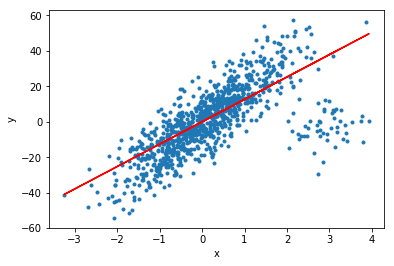

In [428]:
plt.plot(X, y, ".");
plt.plot(X, X * lrm2._coef + X * lrm2._intercept, "r")
plt.xlabel("x");
plt.ylabel("y");

С L2 регуляризацией:

In [435]:
lrm3 = mylinregr.LinearRegression(regularization='L2', alpha=0.1)

In [436]:
lrm3.fit(X_train, y_train)

In [437]:
y3_hat = lrm3.predict(X_test)

In [438]:
print("MAE:", mean_absolute_error(y_test, y3_hat))
print("MSE:", mean_squared_error(y_test, y3_hat))
print("R^2 score:", r2_score(y_test, y3_hat), end='\n\n')

print("handmade MAE:", metrics.mae(y_test, y3_hat))
print("handmade MSE:", metrics.mse(y_test, y3_hat))
print("handmade R^2 score:", metrics.r2_score(y_test, y3_hat))

MAE: 10.062042158972627
MSE: 177.43808189861377
R^2 score: 0.45970848320028646

handmade MAE: 10.062042158972627
handmade MSE: 177.43808189861377
handmade R^2 score: 0.45970848320028646


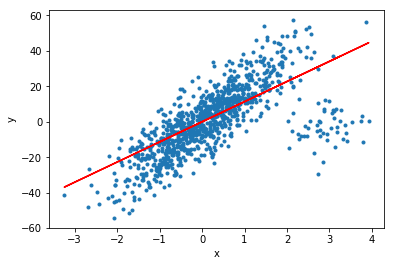

In [439]:
plt.plot(X, y, ".");
plt.plot(X, X * lrm3._coef + X * lrm3._intercept, "r")
plt.xlabel("x");
plt.ylabel("y");